In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts

In [2]:
data=pd.read_csv("BTC-2021min.csv")

In [3]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  object 
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.9+ MB


In [5]:
data.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,6.107820e+05,610782.000000,610782.000000,610782.000000,610782.000000,610782.000000,6.107820e+05
mean,1.627783e+09,46482.265381,46509.783597,46454.085712,46482.567211,3.165254,1.389474e+05
std,1.057906e+07,9453.990285,9454.798088,9453.135638,9454.107853,7.893321,3.298068e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.618621e+09,38129.052500,38157.882500,38099.437500,38129.137500,0.193192,8.859586e+03
50%,1.627783e+09,46666.960000,46697.745000,46636.710000,46667.295000,0.924971,4.190121e+04
75%,1.636944e+09,54907.797500,54938.655000,54877.405000,54907.412500,2.989888,1.349341e+05
max,1.646106e+09,69000.000000,69000.000000,68799.990000,69000.000000,398.565948,1.396792e+07


In [6]:
data.isnull().sum() 

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [7]:
data['symbol'].unique()

array(['BTC/USD'], dtype=object)

In [8]:
data['symbol'] = data['symbol'].replace('BTC/USD', 1)

In [9]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,1,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,1,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,1,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,1,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,1,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610782 entries, 0 to 610781
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        610782 non-null  int64  
 1   date        610782 non-null  object 
 2   symbol      610782 non-null  int64  
 3   open        610782 non-null  float64
 4   high        610782 non-null  float64
 5   low         610782 non-null  float64
 6   close       610782 non-null  float64
 7   Volume BTC  610782 non-null  float64
 8   Volume USD  610782 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.9+ MB


In [11]:
import time

date_string = "2022-03-01 03:43:00"
date_object = time.strptime(date_string,"%Y-%m-%d %H:%M:%S")
unix_timestamp = time.mktime(date_object)
print(unix_timestamp)

1646086380.0


In [12]:
data=data.rename(columns={'Volume BTC' : 'Volume_BTC','Volume USD' : 'Volume_USD'})

In [13]:
data

,unix,date,symbol,open,high,low,close,Volume_BTC,Volume_USD
0,1646106180,2022-03-01 03:43:00,1,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,1,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,1,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,1,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,1,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
...,...,...,...,...,...,...,...,...,...
610777,1609459500,2021-01-01 00:05:00,1,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
610778,1609459440,2021-01-01 00:04:00,1,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
610779,1609459380,2021-01-01 00:03:00,1,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
610780,1609459320,2021-01-01 00:02:00,1,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279


In [14]:
data['Profit/Loss']=(data['close']-data['open'])

In [15]:
data['Difference']=(data['Volume_BTC']-data['Volume_USD'])

In [16]:
data = data.drop(columns=['date'])

In [17]:
data

,unix,symbol,open,high,low,close,Volume_BTC,Volume_USD,Profit/Loss,Difference
0,1646106180,1,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,0.00,0.000000
1,1646106060,1,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,28.35,-6154.530044
2,1646106000,1,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,-6.21,-397.028727
3,1646105940,1,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,-35.72,-35299.569318
4,1646105880,1,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,-28.36,-956.120933
...,...,...,...,...,...,...,...,...,...,...
610777,1609459500,1,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250,-22.36,-30806.836890
610778,1609459440,1,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434,-2.94,-42013.512897
610779,1609459380,1,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387,10.45,-63602.192767
610780,1609459320,1,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279,-33.91,-87984.468977


In [18]:
#sns.pairplot(data)

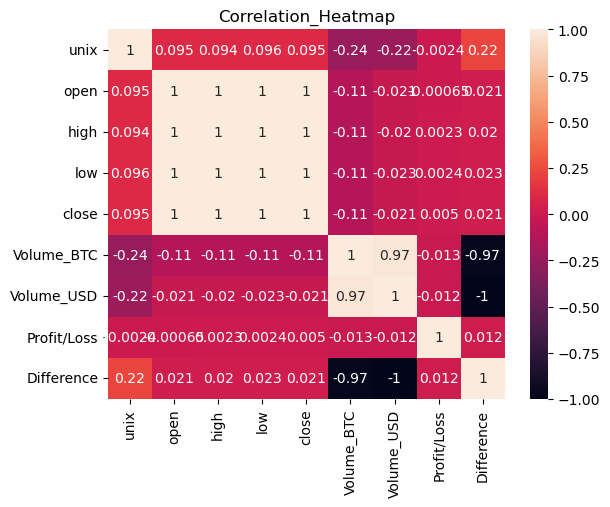

In [19]:
df=data.drop(columns=['symbol'])
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation_Heatmap')
plt.show()

In [20]:
data['mean_diff'] = data['Difference'].mean()
data['mean_diff'].head()

0   -138944.191942
1   -138944.191942
2   -138944.191942
3   -138944.191942
4   -138944.191942
Name: mean_diff, dtype: float64

In [21]:
X=data.drop(columns=['close'])
Y=data['close']

In [22]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.3, random_state=100)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((427547, 10), (183235, 10), (427547,), (183235,))

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
lr.coef_

array([-5.05209984e-19,  5.63507574e-14,  1.00000000e+00,  7.65492053e-15,
       -1.33664814e-14,  8.52509908e-13, -8.15921431e-13,  1.00000000e+00,
       -8.15928697e-13, -6.45797536e-25])

In [26]:
y_pred=lr.predict(x_test)
y_pred

array([35749.24, 35359.8 , 40577.98, ..., 40718.37, 41143.94, 31660.8 ])

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("the mean squared error of the model comes out to be :", mse)

the mean squared error of the model comes out to be : 1.0617761939775524e-21


In [28]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print("the mean squared error of the model comes out to be :", rmse)

the mean squared error of the model comes out to be : 3.25849074569432e-11


In [29]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("the r square score is as follows :",r2)

the r square score is as follows : 1.0


In [30]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state = 51)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=51)

In [31]:
y_pred=rf.predict(x_test)
y_pred

array([35746.8703, 35366.5257, 40577.8124, ..., 40714.0451, 41152.6029,
       31661.1845])

In [32]:
mse = mean_squared_error(y_test ,y_pred)
print("the mean squared error is :",mse)
r2 = r2_score(y_test, y_pred)
print("the r2 score is :",r2)

the mean squared error is : 285.6947933497157
the r2 score is : 0.99999680366505
